In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<h1> Training score </h1> 

<h2>Loading results and preprocessing</h2>

In [2]:
path = "length_gravity_v0.csv"

df3 = pd.read_csv(path)
col = ["Task#","Seed", "Gravity", "Length", "Force_mag", "Episode", "Score"]
df3 = df3[col]
df_gb = df3.groupby(["Task#", "Gravity", "Length", "Force_mag","Episode"]).mean().reset_index()

df_gb2 = df3[["Task#", "Gravity", "Length", "Force_mag","Score"]].groupby(["Task#", "Gravity", "Length", "Force_mag"]).aggregate(lambda x: list(x))
df = df_gb2.reset_index()[["Task#","Score"]]


<h2>Results plot</h2>

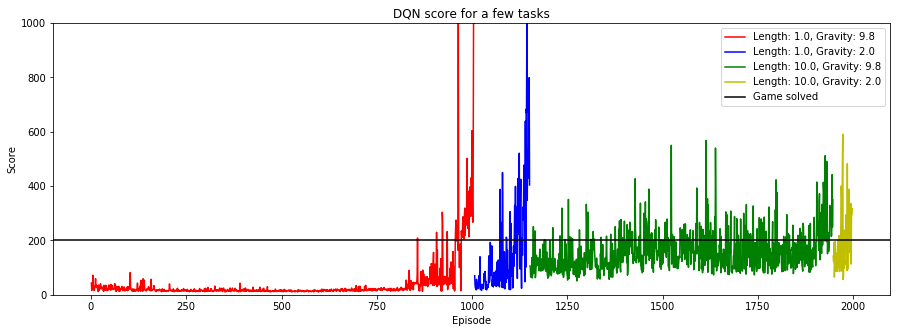

In [3]:

offset = 0
colors = ["r", "b", "g","y"]
fig, ax = plt.subplots(1,1,figsize= (15,5))

param_list = []
for i in range(4):
    params = df3.loc[df3["Task#"] == i].iloc[0].values[2:5]
    param_list += ["Length: {}, Gravity: {}".format(params[0], params[1])]
    values = df.loc[df["Task#"] == i]["Score"].values[0]
    l = len(values)
    plt.plot(list(np.array([i for i in range(1,l+1)])+offset), values, colors[i])
    offset+= l

    
plt.axhline(200,color= "black")
plt.legend([param_list[i] for i in range(4)] + ["Game solved"])

plt.title("DQN score for a few tasks")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.ylim((0,1000))
plt.show()

<h1>Test score</h1>

<h2>Loading results and preprocessing</h2>

In [4]:
path= "length_gravity_test_v0.npy"
dqn_results = np.load(path)
param_lists = dqn_results[0]
results = dqn_results[1:]
results_arr = np.zeros((len(results),len(results)))
l = len(results)
for i in range(l):
    results[i] = list(results[i])
    l_i = len(results[i]) 
    if l_i < l:
        for j in range(l-l_i):
            results[i].append(np.nan)
    results_arr[i,:] = np.array(results[i])


<h2>Results plot</h2>

Text(0.5, 1.0, 'Average')

<Figure size 432x288 with 0 Axes>

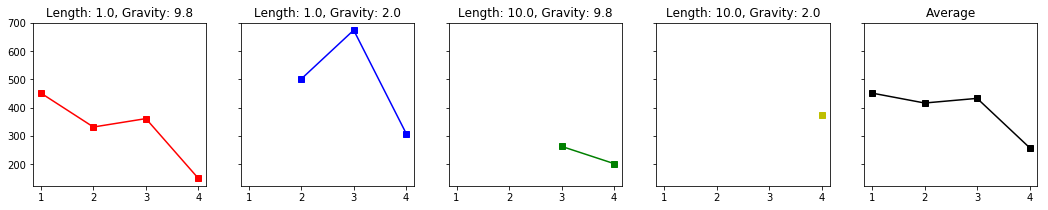

In [10]:
import matplotlib as mpl
x = np.arange(1,5)
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.linewidth'] = 1.5
colors = ["r", "b", "g","y"]

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(18,3), sharex=True,
                                                        sharey=True)
for i in range(4):
    param_i = param_lists[i]
    label = "Length: {}, Gravity: {}".format(param_i[1], param_i[2])
    ax1[i].plot(x[i:], results_arr[i:,i], color = colors[i], marker = "s")
    ax1[i].set_title(label)
    
ax1[-1].plot(x, np.nanmean(results_arr,1), color = "black", marker = "s")
ax1[-1].set_title("Average")
